Training on actual images for cats and dogs classification involves using a labeled dataset containing images of cats and dogs. The process begins with **data preprocessing**, where images are resized, normalized, and augmented (e.g., rotated, flipped) to enhance model robustness. A deep learning model, typically a Convolutional Neural Network (CNN), is then constructed. This model includes layers for feature extraction (convolutional and pooling layers) and classification (fully connected layers).

The dataset is split into training, validation, and testing sets. The model is trained on the labeled training set using an optimization algorithm like Adam, with a binary cross-entropy loss function. Validation data ensures the model generalizes well without overfitting. Finally, the model's performance is evaluated on test data using metrics like accuracy and precision. Tools like TensorFlow or PyTorch are commonly used for this process, enabling efficient handling of real-world image data.

The imports in your notebook indicate you're setting up a PyTorch-based environment for image classification, leveraging libraries for data handling, processing, and visualization. Modules like `os` and `cv2` will help with managing file paths and preprocessing images (e.g., resizing and augmentations). PyTorch's core library (`torch`), along with `torch.nn` and `torch.nn.functional`, will be used to build and define the neural network, while `torch.optim` handles optimization algorithms like Adam or SGD for training. Additionally, `TensorDataset` facilitates creating datasets from tensors, making batching and iteration seamless during training.

For visualizations, `matplotlib.pyplot` will assist in displaying images or plotting training metrics like loss and accuracy. This setup provides the foundation to load and preprocess a dataset, define a model, train it, and visualize results efficiently. You can now proceed to load your images, preprocess them, and define a model architecture for training.

In [1]:
import matplotlib.pyplot as plt
import os
import cv2
import torch.nn as nn
import torch.optim as optim
import torch
from torch.utils.data import TensorDataset
import torch.nn.functional as F

The code snippet loads and visualizes grayscale images from a dataset of dogs and cats stored in separate directories. It iterates through the `CATEGORIES` list, constructing paths to each category folder and reading the images inside using OpenCV (`cv2.imread`) in grayscale mode. The first image of the first category is displayed using Matplotlib (`plt.imshow`) with the axis turned off for a clean view. The `break` statements ensure that only one image is processed and shown for demonstration. This setup is useful for verifying the dataset structure and ensuring images load correctly before further processing.

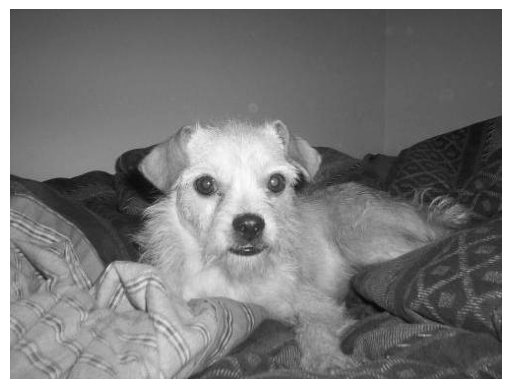

In [ ]:
DATADIR = "./train"
CATEGORIES = ['dogs', 'cats']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) #path to cats or dogs dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.axis('off')
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

This code snippet resizes an image to a fixed size of \( 60 \times 60 \) pixels and displays the resized image. Here's what each part does:

1. **Resizing the Image**:  
   - `cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))` resizes the grayscale image (`img_array`) to dimensions specified by `IMG_SIZE` (60x60 in this case). This is important for ensuring all images in the dataset have consistent dimensions, which is a requirement for feeding them into machine learning models.

2. **Displaying the Resized Image**:  
   - `plt.imshow(new_array, cmap="gray")` displays the resized image in grayscale.
   - `plt.axis('off')` removes axis labels and ticks for a cleaner visualization.
   - `plt.show()` renders the image.

This step is typically used during preprocessing to confirm that the resizing operation works correctly and the image content is preserved despite the downscaling.

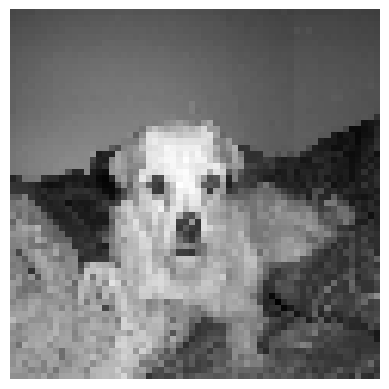

In [3]:
IMG_SIZE = 60
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.axis('off')
plt.show()

The provided code defines a function, `creating_training_data()`, to preprocess and organize image data for training. It iterates through the `CATEGORIES` list, representing the labels (e.g., "dogs" and "cats"), and constructs paths to their respective directories in `DATADIR`. For each image in these directories, it reads the image in grayscale using OpenCV (`cv2.imread`) and resizes it to a fixed dimension of \( 60 \times 60 \) pixels with `cv2.resize()`. Each processed image, along with its label (determined by the index of the category in `CATEGORIES`), is appended as a list to the `training_data` list.

The use of a `try-except` block ensures the function skips any problematic files without halting the entire process, making it robust against errors such as corrupted or unsupported image formats. After calling `creating_training_data()`, the `training_data` list contains tuples of preprocessed images and their corresponding labels, ready for further splitting into training and testing datasets. This step is crucial in preparing the data for model training in tasks like image classification.

In [4]:
traning_data = []

def creating_traning_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) #path to cats or dogs dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                traning_data.append([new_array, class_num])
            except Exception as e:
                pass

creating_traning_data()


This code prints the total number of processed image-label pairs in `training_data`.

In [5]:
print(len(traning_data))

20000


The code `random.shuffle(traning_data)` randomly shuffles the `training_data` list. This is commonly done before splitting the data into training and testing sets to ensure that the model receives a diverse and unbiased distribution of images during training. Shuffling helps prevent the model from learning any patterns based solely on the order of the data, which could lead to overfitting or poor generalization.

In [6]:
import random
random.shuffle(traning_data)

The code `for sample in traning_data[:10]: print(sample[1])` iterates through the first 10 entries in the `training_data` list and prints the label (`sample[1]`) of each entry. Each entry in `training_data` is a list containing two elements: the preprocessed image and its corresponding class label. The `sample[1]` accesses the class label (either 0 for "dogs" or 1 for "cats" depending on the index of the category in `CATEGORIES`). This loop helps verify the distribution of labels in the first 10 samples of the shuffled data.

In [7]:
for sample in traning_data[:10]:
    print(sample[1])

0
1
0
1
1
1
0
1
0
1


The code snippet normalizes the features (images) and separates them into two lists, `X` and `Y`. Here's how it works:

1. **Normalization**:  
   - `features/255` normalizes the pixel values of each image (`features`). Since image pixel values range from 0 to 255, dividing each pixel by 255 scales the values to a range of 0 to 1. This is a common practice in machine learning to improve convergence during training, as models tend to perform better with normalized input data.

2. **Appending to `X` and `Y`**:
   - The `features` (after normalization) are appended to the list `X`, which will be used as input data for the model.
   - The `label` (0 for "dogs" or 1 for "cats") is appended to the list `Y`, which will be used as the target labels for training.

After running this code, `X` will contain the normalized image data, and `Y` will hold the corresponding labels for each image, both of which can be used to train a machine learning model.

In [30]:
X = []
Y = []
for features, label in traning_data:
    X.append(features/255)
    Y.append(label)

Prints the normalized pixel values of the first image in `X`.

In [10]:
print(X[0])

[[0.25098039 0.23137255 0.23921569 ... 0.27843137 0.27843137 0.2745098 ]
 [0.08627451 0.09411765 0.08235294 ... 0.27058824 0.2745098  0.2745098 ]
 [0.0745098  0.09019608 0.10196078 ... 0.2745098  0.27843137 0.28627451]
 ...
 [0.29803922 0.34117647 0.34117647 ... 0.25098039 0.25490196 0.25882353]
 [0.26666667 0.30588235 0.30196078 ... 0.24705882 0.25882353 0.27058824]
 [0.2745098  0.31764706 0.32156863 ... 0.24313725 0.25490196 0.25882353]]


The code converts the preprocessed image data (`X`) and labels (`Y`) into PyTorch tensors with appropriate data types (`float32` for images and `long` for labels). It then splits the data into training and testing sets, using 20% of the data for testing and the remaining 80% for training. The `TensorDataset` class is used to pair the image tensors with their corresponding labels, creating datasets for both training and testing.

Next, `DataLoader` is used to load the training and testing datasets in batches of 64, with shuffling enabled for the training set to ensure randomness during training. The testing set does not require shuffling, as the model is evaluated on the data in the same order during testing. These `train_loader` and `test_loader` will be used to feed batches of data into the model during training and evaluation.

In [12]:
# Assuming img and labels are NumPy arrays or lists
img_tensor = torch.tensor(X, dtype=torch.float32)  # Convert images to tensor
labels_tensor = torch.tensor(Y, dtype=torch.long)  # Convert labels to tensor

validation_len = int(0.2 * len(img_tensor))  # Use 20% for testing
train_images, test_images = img_tensor, img_tensor[:validation_len]
train_labels, test_labels = labels_tensor, labels_tensor[:validation_len]


train_dataset = TensorDataset(train_images, train_labels)
test_dataset = TensorDataset(test_images, test_labels)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

The code provided iterates through the `train_dataset` and visualizes the first 18 images along with their corresponding labels. Here's a breakdown:

1. **Iteration over `train_dataset`**:  
   - The `enumerate(train_dataset)` loop goes through each image-label pair in the `train_dataset`. For each pair, `k` is the index, and `image` and `label` represent the current image and its corresponding label.

2. **Condition for Breaking**:  
   - The loop will break after the 18th image is processed (`if k == 18: break`), meaning only the first 18 images are visualized.

3. **Visualization**:
   - `plt.subplot(3, 6, k+1)` arranges the images in a 3x6 grid (3 rows and 6 columns).
   - `plt.axis('off')` hides the axis for a cleaner visualization.
   - `plt.title('DOG' if (int(label))==0 else 'CAT')` adds the title "DOG" or "CAT" based on the label value (0 for dog, 1 for cat).
   - `plt.imshow(image, cmap='gray')` displays the image in grayscale.

This will generate a grid of 18 images from the training dataset, each labeled as either "DOG" or "CAT".

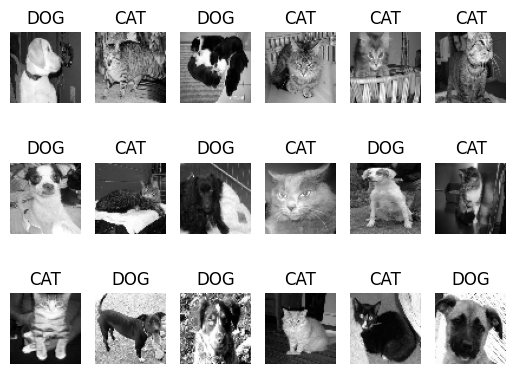

In [31]:
for k, (image, label) in enumerate(train_dataset):
    # print(k, image, label)
    if k == 18:
        break
    plt.subplot(3, 6, k+1)
    plt.axis('off')
    plt.title('DOG' if (int(label))==0 else 'CAT')
    plt.imshow(image, cmap='gray')

The code defines a neural network model `Cats_dog_Classifier` using PyTorch's `nn.Module`. In the `__init__` method, the model initializes a series of fully connected (linear) layers. The input layer, `layer1`, takes an input of size \(60 \times 60 = 3600\) (the flattened images). The network progressively reduces the dimensionality with successive layers: `layer2` (500 units), `layer3` (400 units), `layer4` (300 units), `layer5` (250 units), `layer6` (100 units), and finally, `layer7`, which outputs a prediction of 2 units, corresponding to the two categories: "cat" and "dog".

In the `forward` method, the input image is first flattened from a \(60 \times 60\) matrix into a 1D vector with `.view(-1, 60*60)`. Then, the image data passes through each layer sequentially, with ReLU activation functions applied after each linear transformation (`F.relu`). The final output layer (`layer7`) produces a vector of 2 values, representing the class scores for "cat" and "dog".

Finally, the model is instantiated as `cnn_model = Cats_dog_Classifier()`. This creates the classifier, ready to be trained with the training data.

In [23]:
class Cats_dog_Classifier(nn.Module):
  def __init__(self):
    super(Cats_dog_Classifier, self).__init__()



    self.layer1 = nn.Linear(60*60, 500)
    self.layer2 = nn.Linear(500, 400)
    self.layer3 = nn.Linear(400, 300)
    self.layer4 = nn.Linear(300, 250)
    self.layer5 = nn.Linear(250, 100)
    self.layer6 = nn.Linear(100, 50)
    self.layer7 = nn.Linear(50, 2)



  def forward(self, img):
    flattened = img.view(-1, 60*60)


    activation1 = F.relu(self.layer1(flattened))
    activation2 = F.relu(self.layer2(activation1))
    activation3 = F.relu(self.layer3(activation2))
    activation4 = F.relu(self.layer4(activation3))
    activation5 = F.relu(self.layer5(activation4))
    activation6 = F.relu(self.layer6(activation5))

    output = self.layer7(activation6)
    return output

cnn_model = Cats_dog_Classifier()
cnn_model

Cats_dog_Classifier(
  (layer1): Linear(in_features=3600, out_features=500, bias=True)
  (layer2): Linear(in_features=500, out_features=400, bias=True)
  (layer3): Linear(in_features=400, out_features=300, bias=True)
  (layer4): Linear(in_features=300, out_features=250, bias=True)
  (layer5): Linear(in_features=250, out_features=100, bias=True)
  (layer6): Linear(in_features=100, out_features=50, bias=True)
  (layer7): Linear(in_features=50, out_features=2, bias=True)
)

In this code, the loss function and optimizer are defined for training the `Cats_dog_Classifier` model.

1. **Loss Function**:  
   - `criterion = nn.CrossEntropyLoss()` sets the loss function to Cross-Entropy Loss, which is commonly used for multi-class classification tasks. It compares the predicted class probabilities (output of the model) with the true labels (the target class) and computes the loss. This loss guides the model's learning during training by penalizing incorrect predictions more heavily.

2. **Optimizer**:  
   - `optimizer = optim.SGD(cnn_model.parameters(), lr=0.01, momentum=0.9)` defines the optimizer as Stochastic Gradient Descent (SGD). It updates the model's parameters based on the gradients computed during backpropagation. The learning rate (`lr=0.01`) controls the step size for each update, and the momentum (`momentum=0.9`) helps accelerate gradients vectors in the right direction, preventing oscillations during training.

Together, these components are used during the training loop to adjust the model's weights and minimize the loss function over time, improving the model's accuracy.

In [32]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn_model.parameters(), lr=0.01, momentum=0.9)

The function `get_accuracy(model, train=False)` calculates the accuracy of the given model on either the training or testing dataset. It checks the `train` argument to determine whether to use the `train_dataset` or `test_dataset`. For each batch in the selected dataset, the function passes the images through the model to obtain predictions (`output`). The predicted class labels (`pred`) are compared to the true labels (`labels`) using the `eq()` function, which returns a boolean tensor indicating correct predictions. The number of correct predictions is accumulated in `correct`, and the total number of images is tracked in `total`. Finally, the accuracy is computed as the ratio of correct predictions to total samples and returned as a decimal value.

In [17]:
def get_accuracy(model, train=False):
  if train:
    data = train_dataset
  else:
    data = test_dataset
  correct = 0
  total = 0
  for imgs, labels in torch.utils.data.DataLoader(data, batch_size=64):
    output = model(imgs)
    pred  = output.max(1, keepdim=True)[1]
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += imgs.shape[0]
  return correct / total

The function `train(model, dataset, num_epochs=1)` is designed to train the given model on the provided dataset for a specified number of epochs. Within each epoch, the model goes through the dataset, processes the input images, and computes the predictions (`out`). The Cross-Entropy Loss (`criterion`) is then calculated by comparing the model's predictions to the true labels (`labels`). The gradients of the loss are computed using `loss.backward()`, and the optimizer (`SGD`) updates the model's weights by calling `optimizer.step()`. After each update, `optimizer.zero_grad()` is used to clear the gradients in preparation for the next batch.

The function also tracks the cumulative loss (`running_loss`) for each epoch. Every 10 epochs, it prints the average loss for the epoch to give a sense of how the model is performing and how the loss is decreasing. This helps monitor the training progress and adjust parameters as necessary.

In [28]:
def train(model, dataset, num_epochs=1):
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
  for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in dataset:
        out = model(inputs)
        loss = criterion(out, labels)  # Calculate the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        optimizer.zero_grad()  # Zero the gradients

        running_loss += loss.item()
    if epoch%10 == 0:
      print(f"Epoch {epoch}/{num_epochs}, Loss: {running_loss/len(dataset)}")


The code `train(cnn_model, train_loader, 100)` calls the `train` function to start training the `cnn_model` on the `train_loader` dataset for 100 epochs.

1. **`cnn_model`**: This is the neural network model you previously defined, which will be trained using the dataset.
   
2. **`train_loader`**: This is the data loader that provides the training data in batches. It helps efficiently load and manage the training data during the training process.

3. **`100`**: This specifies the number of epochs the model will be trained for. An epoch is one complete pass through the entire training dataset.

During the training process, the model will go through the dataset 100 times, updating its weights to minimize the loss and improve its accuracy on the task of classifying images as "cats" or "dogs". The average loss for every 10 epochs will be printed to monitor the model's progress.

In [29]:
train(cnn_model, train_loader, 100)

Epoch 0/100, Loss: 0.6935197326321952
Epoch 10/100, Loss: 0.6413389827115848
Epoch 20/100, Loss: 0.6091627550963015
Epoch 30/100, Loss: 0.5637500958320812
Epoch 40/100, Loss: 0.5161929800868416
Epoch 50/100, Loss: 0.44707760329063706
Epoch 60/100, Loss: 0.37574885628474786
Epoch 70/100, Loss: 0.32821906884066976
Epoch 80/100, Loss: 0.23735524935368152
Epoch 90/100, Loss: 0.1956301051111648


The code `get_accuracy(cnn_model, train_loader)` calculates the accuracy of the trained `cnn_model` on the training data provided by `train_loader`.

Here's how it works:
1. **`cnn_model`**: This is the neural network model that has been trained (or is in the process of being trained).
2. **`train_loader`**: This is the data loader containing the training dataset, which supplies the input images and their corresponding labels in batches.

The `get_accuracy` function iterates through the batches of images and labels in `train_loader`, passes the images through the model to obtain predictions, compares those predictions with the actual labels, and computes the accuracy by dividing the number of correct predictions by the total number of samples in the dataset.

The result will be a value representing the proportion of correct predictions made by the model on the training dataset.

In [33]:
get_accuracy(cnn_model, train_loader)

0.9103

The `pridect(model, img)` function takes an image (`img`) as input, passes it through the trained model to get predictions (`out`), and determines the predicted label using `torch.max()`. The image is then displayed, and the predicted label (either "dog" or "cat") is printed based on the output.

In [34]:
def pridect(model, img):
  
  out = model(img)
  _, predicted_labels = torch.max(out.data, 1)
  plt.imshow(img, cmap="gray")
  plt.axis('off')
  plt.show()
  print(predicted_labels)
  print("dog" if predicted_labels == 0 else 'cat')

The code `pridect(cnn_model, train_loader.dataset.tensors[0][0])` calls the `pridect` function with the first image from the training dataset. Here's a breakdown:

1. **`cnn_model`**: This is the trained model that will be used to make predictions.
2. **`train_loader.dataset.tensors[0][0]`**: This accesses the first image from the `train_loader`. 
   - `train_loader.dataset.tensors[0]` contains the images (`X`), and `[0][0]` selects the first image in the dataset.
   
The `pridect` function will then:
- Pass the first image through the model to get the output predictions.
- Display the image using `matplotlib`.
- Print the predicted label ("dog" or "cat") based on the model's output.

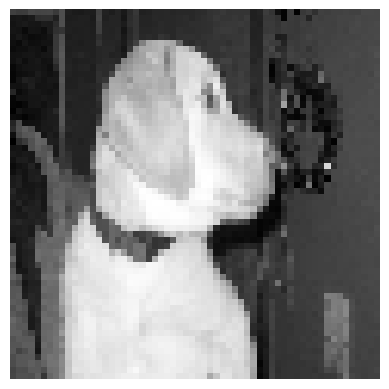

tensor([0])
dog


In [40]:
pridect(cnn_model, train_loader.dataset.tensors[0][0])